# 1.5)

In [252]:

import pandas as pd
import sns
from sklearn.model_selection import train_test_split

In [253]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

werte = ['Edaily', 'Dci', 'Dcp', 'Dcu', 'Temp1']
X = df[werte].copy()
X.index = pd.to_datetime(df['Time'])

target_col_idx = 2

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Numpy Array

# --- Aufgabe b)
train_size = int(len(X_scaled) * 0.8)

# Arrays nutzen Slicing mit [], kein .iloc
x_train_data = X_scaled[:train_size]
x_test_data = X_scaled[train_size:]





C:\Users\M-PC\AppData\Local\Temp\ipykernel_49420\4186670824.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X.index = pd.to_datetime(df['Time'])



# c)

In [254]:

windows_size = 36

In [255]:
def restructure_dat(dataset, target_idx, window_size):
	X_, Y_ = [], []

	for i in range(len(dataset) - window_size):
		window = dataset[i: i + window_size, :]
		X_.append(window)

		label = dataset[i + window_size, target_idx]
		Y_.append(label)

	return np.array(X_), np.array(Y_)

In [256]:

# Funktion aufrufen
X_train, y_train = restructure_dat(x_train_data, target_col_idx, windows_size)
X_test, y_test = restructure_dat(x_test_data, target_col_idx, windows_size)

print("Training Shape:")
print(f"Input X: {X_train.shape} (Samples, Zeitschritte, Features)")
print(f"Target y: {y_train.shape} (Samples, 1 Wert)")

Training Shape:
Input X: (2800, 36, 5) (Samples, Zeitschritte, Features)
Target y: (2800,) (Samples, 1 Wert)


# D)

In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(InputLayer(shape=(windows_size, 5)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3254 - mae: 0.3204 - val_loss: 0.0383 - val_mae: 0.1109
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1291 - mae: 0.1947 - val_loss: 0.0334 - val_mae: 0.1122
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1139 - mae: 0.1811 - val_loss: 0.0296 - val_mae: 0.0836
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1021 - mae: 0.1663 - val_loss: 0.0283 - val_mae: 0.0845
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1018 - mae: 0.1562 - val_loss: 0.0266 - val_mae: 0.0758
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0960 - mae: 0.1551 - val_loss: 0.0249 - val_mae: 0.0749
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0893 - mae: 0.1501 - val_loss: 0.0247 - val_mae: 0.0743
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0846 - mae: 0.1423 - val_loss: 0.0227 - val_mae: 0.0733
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.088

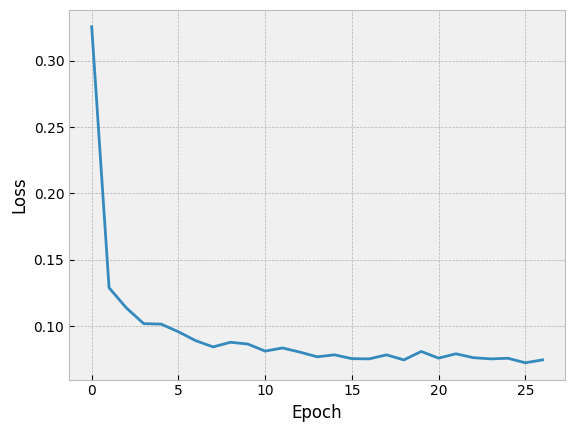

In [259]:
plt.rcdefaults()
plt.style.use('bmh')
plt.rcParams.update({
    'figure.facecolor': 'white',  # Hintergrund des gesamten Bildes
    'axes.facecolor': '#f0f0f0',  # Hintergrund der Plot-Fläche (bmh typisch)
    'text.color': 'white',
    'savefig.facecolor': 'white',  # Beim Speichern weißer Hintergrund
    'axes.titleweight': 'bold',  # Titel immer fett
    'legend.frameon': True,  # Legende mit Rahmen
    'legend.facecolor': 'white'  # Legendenhintergrund weiß
})

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(history.history['loss'])

In [260]:
x_test.head()


,Edaily,Dci,Dci,Temp1,Time
3275,4.284,0.770932,0.770932,21.0,14.01.21 13:55
2510,0.000,0.000000,0.000000,0.0,29.01.21 16:50
1334,20.056,1.923437,1.923437,27.0,10.01.21 15:40
1040,0.119,0.193603,0.193603,10.0,08.01.21 09:30
2490,0.000,0.000000,0.000000,0.0,29.01.21 15:10


In [264]:
y_pred_scaled = model.predict(X_test)

# Create dummy matrix to satisfy the Scaler's shape requirement (5 columns)
dummy = np.zeros((len(y_pred_scaled), X.shape[1]))
dummy[:, target_col_idx] = y_pred_scaled.flatten()

# Inverse transform
y_pred_inv = scaler.inverse_transform(dummy)[:, target_col_idx]

# Do the same for y_test to compare
y_test_inv = np.zeros((len(y_test), X.shape[1]))
y_test_inv[:, target_col_idx] = y_test.flatten()
y_true_real = scaler.inverse_transform(y_test_inv)[:, target_col_idx]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


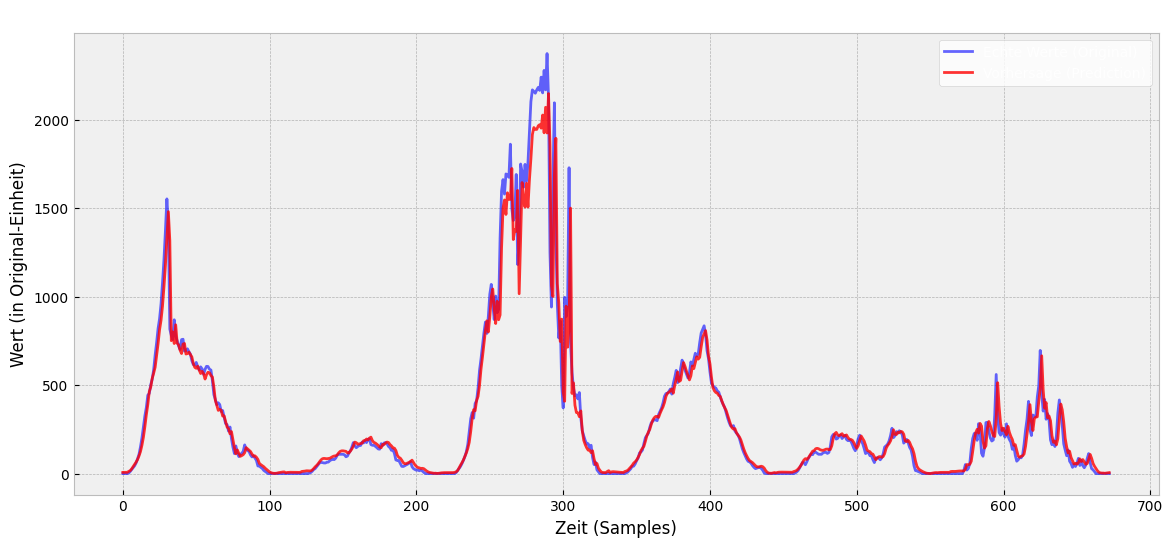

In [266]:
# Plot-Größe festlegen
plt.figure(figsize=(14, 6))

# Echtdaten (Original)
plt.plot(y_true_real, color='blue', label='Echte Werte (Original)', alpha=0.6)

# Vorhersage (Prediction)
plt.plot(y_pred_inv, color='red', label='Vorhersage (Prediction)', alpha=0.8)

plt.title('Vergleich: Vorhersage vs. Realität')
plt.xlabel('Zeit (Samples)')
plt.ylabel('Wert (in Original-Einheit)')
plt.legend()
plt.show()